In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms as T

In [2]:
train_df=pd.read_csv('data/train.csv')
train_df.head(10)

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1
5,0017c3c18ddd57a2ea6f9848c79d83d2.jpg,1
6,002134abf28af54575c18741b89dd2a4.jpg,0
7,0024320f43bdd490562246435af4f90b.jpg,0
8,002930423b9840e67e5a54afd4768a1e.jpg,1
9,00351838ebf6dff6e53056e00a1e307c.jpg,1


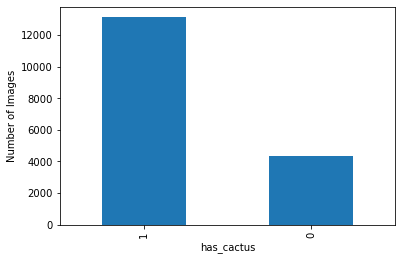

Total number of images= 17500


In [3]:
train_df.has_cactus.value_counts().plot(kind='bar')
plt.ylabel('Number of Images')
plt.xlabel('has_cactus')
plt.show()
print('Total number of images=',len(train_df))

The training data is quite unbalanced, with most pictures having cactus in them.

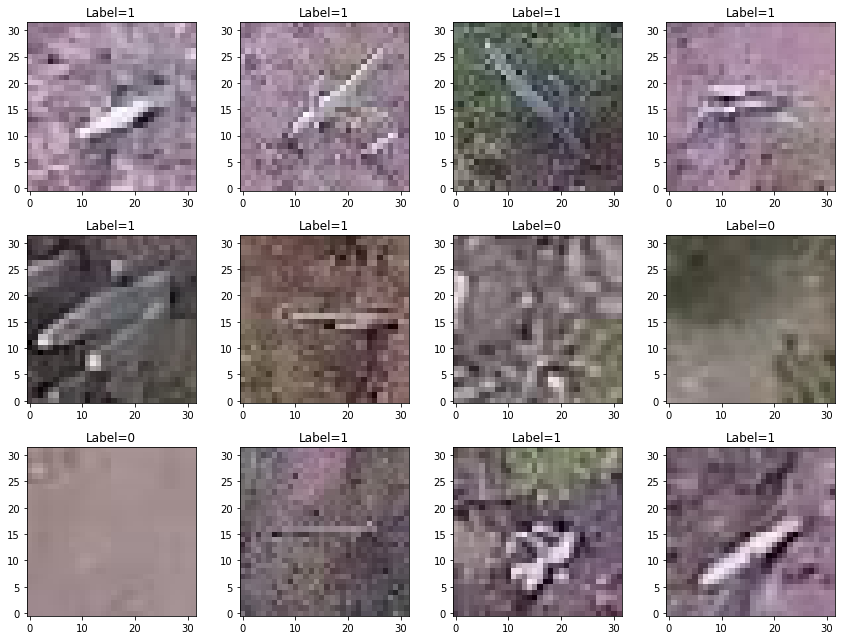

In [5]:
# randomly draw some pictures 

num_image=12
draw_image_id=np.random.randint(len(train_df),size=num_image,)
image_ids=[train_df.loc[i].id for i in draw_image_id]
image_labels=[train_df.loc[i].has_cactus for i in draw_image_id]

# see how images look like with their labels

plt.figure(figsize=(12,9))

for idx, id in enumerate(image_ids):
    
    plt.subplot(3,4,idx+1)
    
    image=plt.imread('data/train/'+id)
    
    label=image_labels[idx]
    
    plt.imshow(image,origin='lower')
    
    plt.title('Label='+str(label))

plt.tight_layout()
plt.savefig('Cactus_Images_sample.png',dpi=400)
plt.show()

It looks like the color would not be helpful in determining if the picture has a cactus

(because unneccessary information will make the model unneccessarily complex)

### Will test if color is important in building model

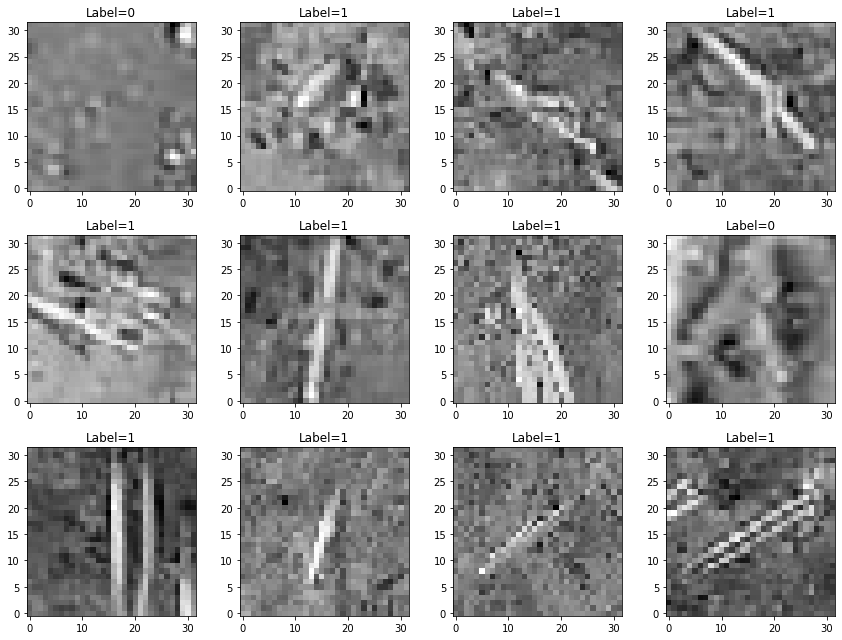

In [11]:
# randomly draw some pictures 

num_image=12
draw_image_id=np.random.randint(len(train_df),size=num_image,)
image_ids=[train_df.loc[i].id for i in draw_image_id]
image_labels=[train_df.loc[i].has_cactus for i in draw_image_id]

# see how images look like with their labels

plt.figure(figsize=(12,9))

for idx, id in enumerate(image_ids):
    
    plt.subplot(3,4,idx+1)
    
    image=Image.open('data/train/'+id)
    
    gray_transform=T.Compose([T.Grayscale(num_output_channels=1)])
    
    label=image_labels[idx]
    
    plt.imshow(gray_transform(image),cmap='gray',origin='lower')
    
    plt.title('Label='+str(label))

plt.tight_layout()
plt.show()